In [ ]:
# Create training set with chapters of Kafka's "The Trial" and "The Castle"

#First: 

#Instructions: write a first chapter of ... (With how long it should be)
# Output chapter: 

#Second:
# Tell me what happend in the chapter


#third 
# What part is missing 


#Four: 
# This happend .... write the next chapter for this part. 

In [4]:
# read all txt.files and count words

import os
import re

chapters = {}
datapath = "resources/novels/the_trial"
for filename in os.listdir(datapath):
    with open(os.path.join(datapath, filename), "r") as file:
        text = file.read()
        chapters[filename] = text

words_count = {}
for filename, text in chapters.items(): 
    # count words
    words = re.findall(r'\w+', text)
    words_count[filename] = len(words)

words_count

{'the_trial_10_the_end.txt': 1926,
 'the_trial_4_empty_courtroom.txt': 8813,
 'the_trial_5_the_flogger.txt': 2425,
 'the_trial_8_dismissal.txt': 11038,
 'the_trial_1_arrest.txt': 5446,
 'the_trial_6_unlce.txt': 7671,
 'the_trial_3_initial_inquiry.txt': 5732,
 'the_trial_2_conversation.txt': 4698,
 'the_trial_9_cathedral.txt': 8582,
 'the_trial_7_law_man_paint.txt': 18297}

In [6]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 2.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 24.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.9/245.9 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 34.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 21.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


Matplotlib is building the font cache; this may take a moment.


{'whiskers': [<matplotlib.lines.Line2D at 0x118bacc90>,
 'caps': [<matplotlib.lines.Line2D at 0x118bae350>,
 'boxes': [<matplotlib.lines.Line2D at 0x118ba3a10>],
 'medians': [<matplotlib.lines.Line2D at 0x118bafb10>],
 'fliers': [<matplotlib.lines.Line2D at 0x118bbcc50>],
 'means': []}

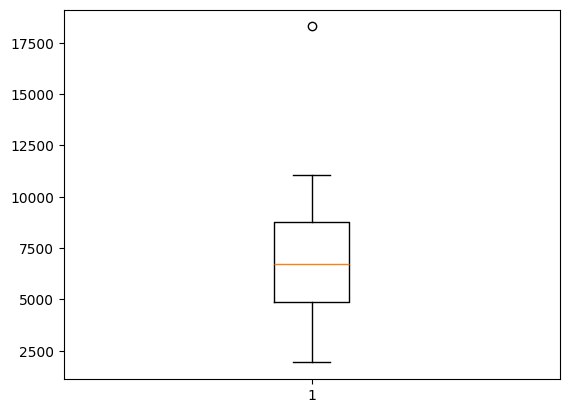

In [7]:
# Draw a boxplot over a words_count dictionary 

import matplotlib.pyplot as plt
plt.boxplot(words_count.values())

(array([2., 3., 1., 2., 1., 0., 0., 1.]),
 array([ 1926.   ,  3972.375,  6018.75 ,  8065.125, 10111.5  , 12157.875,
        14204.25 , 16250.625, 18297.   ]),
 <BarContainer object of 8 artists>)

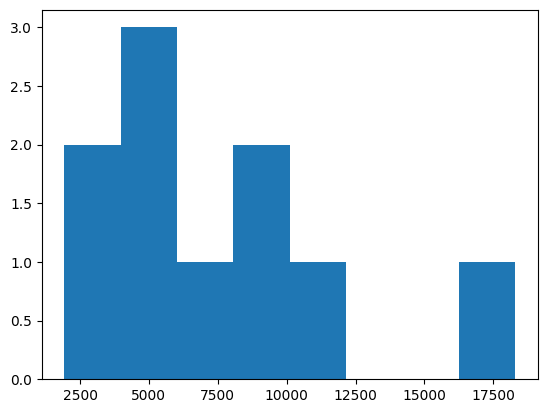

In [13]:
# Draw a histogram over a words_count dictionary

plt.hist(words_count.values(), bins=8)

# Let then say we want something between 5000 and 7500 words

In [ ]:
# create a training set for LLM using kafka's "The Trail" chapters 

prompt = "Generate a first chapter of Kafka's 'The Trial' that's about ... words"

prompt = "What is the first chapter of Kafka's The Trial about? Use around ... words"

prompt = |"Write the chapter of Kafka's novel between X and Y. Chpater X ends with... and chapter Y starts with..."''

prompt = "Write the next chapter of Kafka's 'The Trial' after the ending of previous chapter and begining of the next that goes... " 

prompt = "what happens the chater before the missing part "

prompt = "what happens the chapter after the missing part "